# XRP Price Analysis (30 Days)

This project explores the daily price movement of XRP/USDT over the past 30 days using data pulled from the CoinGecko API. The analysis includes:

- Time-series visualization of prices
- Daily returns calculation
- Moving averages (5-day and 15-day)
- 7-day rolling volatility

## Tools Used
- Python
- Pandas
- Matplotlib
- CoinGecko API

## Insights
- Identified daily volatility trends
- Observed key moving average crossovers
- Prepared the dataset for potential trading signal modeling

## To Run
Install dependencies:

In [3]:
pip install pycoingecko pandas matplotlib 

  Using cached pycoingecko-3.2.0-py3-none-any.whl.metadata (16 kB)
Using cached pycoingecko-3.2.0-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
cg = CoinGeckoAPI()


In [5]:
data= cg.get_coin_market_chart_by_id(id='ripple', vs_currency='usd',days=30)

In [6]:
price_data = data['prices']
df = pd.DataFrame(price_data, columns=['timestamp', 'price'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True)

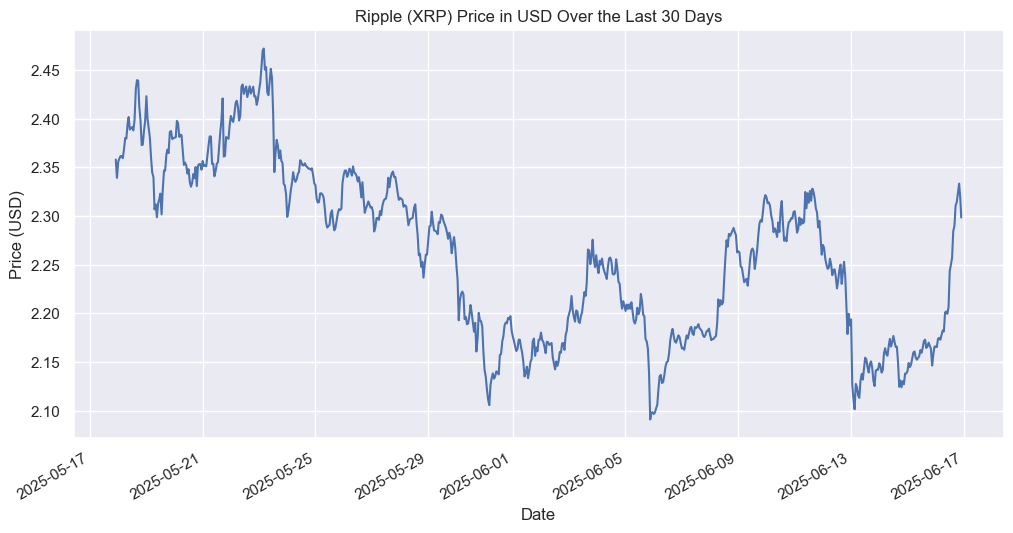

In [7]:
plt.figure(figsize=(12, 6))
df['price'].plot(title='Ripple (XRP) Price in USD Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

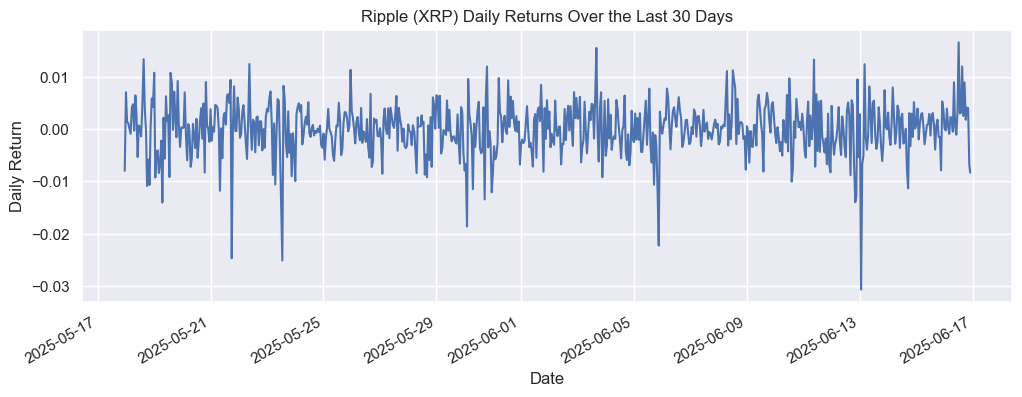

In [8]:
df['daily_return'] = df['price'].pct_change()
plt.figure(figsize=(12, 4))
df['daily_return'].plot(title='Ripple (XRP) Daily Returns Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

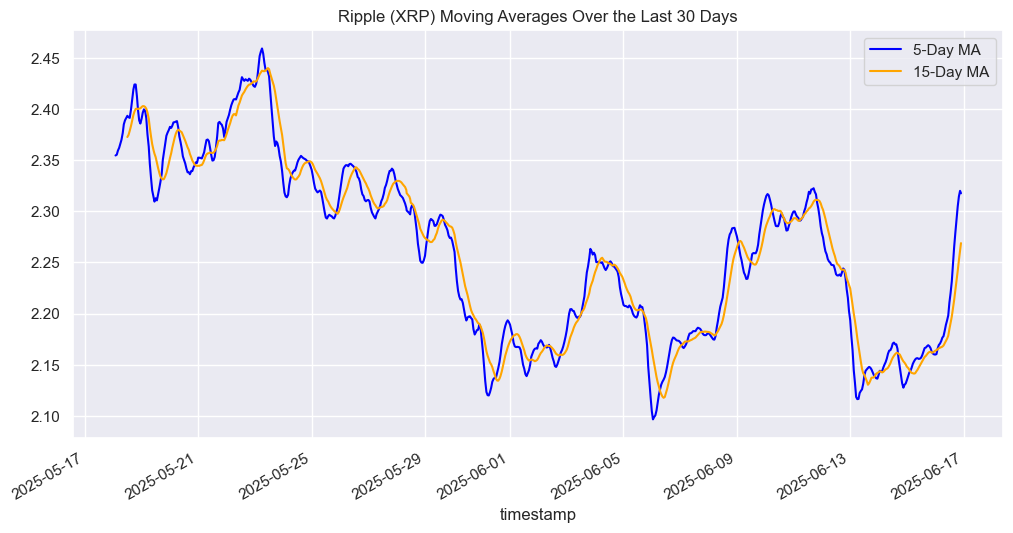

In [9]:
df['MA_5'] = df['price'].rolling(window=5).mean()
df['MA_15'] = df['price'].rolling(window=15).mean()
plt.figure(figsize=(12, 6))
df['MA_5'].plot(label='5-Day MA', color='blue')
df['MA_15'].plot(label='15-Day MA', color='orange')
plt.legend()
plt.title('Ripple (XRP) Moving Averages Over the Last 30 Days')
plt.grid(True)
plt.show()

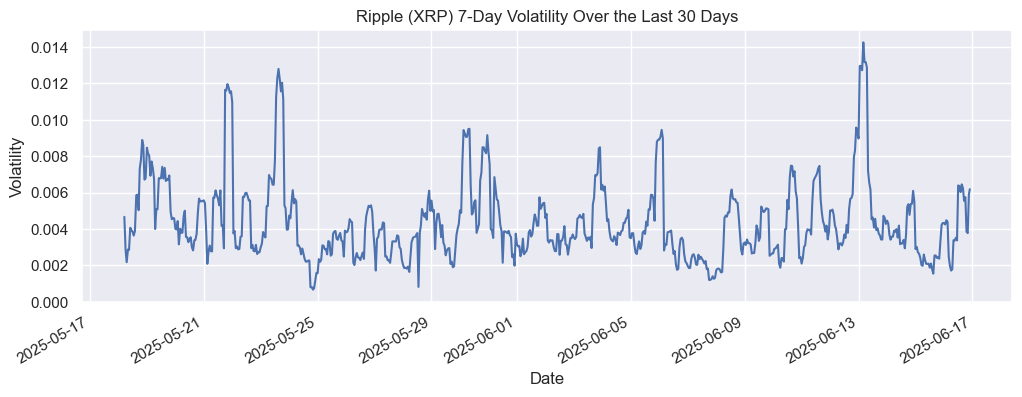

In [10]:
df['volatility_7'] = df['daily_return'].rolling(window=7).std()
plt.figure(figsize=(12, 4))
df['volatility_7'].plot(title='Ripple (XRP) 7-Day Volatility Over the Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


In [11]:
df.to_csv('xrp_analysis.csv')

In [12]:
#Perform linear regression to predict future prices
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array(range(len(df))).reshape(-1, 1)  # Days as feature
y = df['price'].values  # Prices as target
model = LinearRegression()


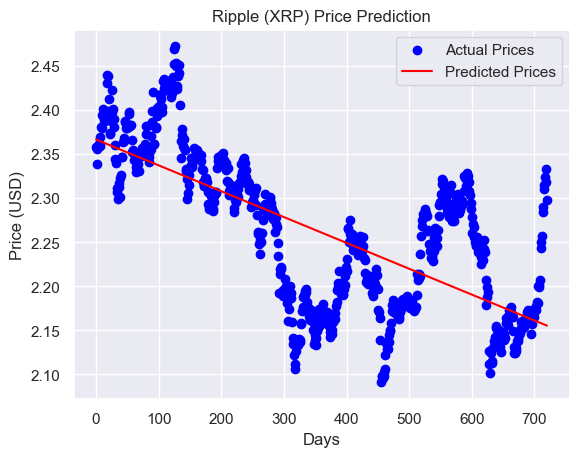

In [14]:
plt.scatter(X, y, color='blue', label='Actual Prices')
model.fit(X, y)
predictions = model.predict(X)
plt.plot(X, predictions, color='red', label='Predicted Prices')
plt.title('Ripple (XRP) Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
